# **Clustering**

**Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

**Data Pre-processing**

In [ ]:
dataset = pd.read_csv('data.csv')

In [ ]:
dataset

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11778,11778,-0.158279,1.858053,-0.921248,-1.429355,-0.764838,-1.589881,-1.040811,10,0,...,-0.348376,-0.869971,2.027264,3.412598,-0.064369,-2.231076,1.034084,0.973716,0.578975,0.961858
11779,11779,1.525135,-0.607098,-1.150169,0.097532,0.080528,-0.455163,-0.789688,0,8,...,1.921439,-1.081978,0.755980,0.535688,-1.206252,1.457501,1.384902,0.079117,1.583883,-0.010434
11780,11780,-0.620387,-0.571274,-0.055193,-1.439184,0.453599,1.753876,-0.123739,1,7,...,-0.698945,1.263422,-1.094891,-3.188875,1.365082,-0.042190,-0.127365,-0.341521,-0.650510,2.074136
11781,11781,0.508547,-1.457904,-1.744796,-1.463034,-1.262898,-0.636495,1.013085,2,4,...,1.243519,1.027125,-0.031330,-3.912239,0.804292,-0.280057,0.873512,-0.340227,0.699506,0.205752


In [ ]:
dataset.isna().sum()

id      0
f_00    0
f_01    0
f_02    0
f_03    0
f_04    0
f_05    0
f_06    0
f_07    0
f_08    0
f_09    0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    1
f_16    1
f_17    1
f_18    1
f_19    1
f_20    1
f_21    1
f_22    1
f_23    1
f_24    1
f_25    1
f_26    1
f_27    1
f_28    1
dtype: int64

In [ ]:
dataset.shape

(11783, 30)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11783 entries, 0 to 11782
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11783 non-null  int64  
 1   f_00    11783 non-null  float64
 2   f_01    11783 non-null  float64
 3   f_02    11783 non-null  float64
 4   f_03    11783 non-null  float64
 5   f_04    11783 non-null  float64
 6   f_05    11783 non-null  float64
 7   f_06    11783 non-null  float64
 8   f_07    11783 non-null  int64  
 9   f_08    11783 non-null  int64  
 10  f_09    11783 non-null  int64  
 11  f_10    11783 non-null  int64  
 12  f_11    11783 non-null  int64  
 13  f_12    11783 non-null  int64  
 14  f_13    11783 non-null  int64  
 15  f_14    11783 non-null  float64
 16  f_15    11782 non-null  float64
 17  f_16    11782 non-null  float64
 18  f_17    11782 non-null  float64
 19  f_18    11782 non-null  float64
 20  f_19    11782 non-null  float64
 21  f_20    11782 non-null  float64
 22

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.drop('id', axis=1, inplace=True)

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(dataset)

df_scaled = pd.DataFrame(scaled_df, columns=dataset.columns)

df_scaled.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.387661,-0.910925,0.646339,0.593247,-0.827513,0.742537,2.259595,-0.966957,1.495756,0.985589,...,-0.470556,-0.759687,-0.759855,-0.711374,0.900450,-0.684752,0.765463,0.956962,1.058161,0.682993
1,-0.687692,-0.456304,0.651517,0.998566,-1.646285,0.872187,-0.094171,-0.966957,-0.899682,-0.370146,...,-0.421218,-0.096589,-1.780561,-0.541965,0.444898,1.025522,-0.135542,-0.548094,0.366201,-1.584807
2,0.811646,0.315062,-1.157490,-0.617645,0.104846,0.792654,1.988812,-0.152360,1.016668,-0.539613,...,-0.406047,-1.599997,1.195026,2.230884,0.079360,-1.515641,-0.581523,0.975549,-0.919385,-2.201516
3,-0.499240,0.220421,0.264822,0.236501,0.413118,-1.204295,0.135775,0.119173,-1.139226,0.816123,...,0.620883,1.272866,0.536791,0.724818,-1.223687,0.819203,-1.171348,-0.393916,-0.104892,0.309668
4,-0.669699,-1.036502,-0.264824,-1.820792,-0.289060,-1.833230,0.780070,0.662238,0.058493,-0.539613,...,-1.614418,-0.439562,0.326431,0.216847,-1.488190,0.840835,-0.625954,1.161430,-0.377376,-1.134840


**K-means Clustering**

In [ ]:
# Initialize the KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=3)
kmeans_cluster = kmeans.fit_predict(df_scaled)
df_scaled['Cluster'] = kmeans_cluster
df_scaled.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,Cluster
0,-0.387661,-0.910925,0.646339,0.593247,-0.827513,0.742537,2.259595,-0.966957,1.495756,0.985589,...,-0.759687,-0.759855,-0.711374,0.900450,-0.684752,0.765463,0.956962,1.058161,0.682993,2
1,-0.687692,-0.456304,0.651517,0.998566,-1.646285,0.872187,-0.094171,-0.966957,-0.899682,-0.370146,...,-0.096589,-1.780561,-0.541965,0.444898,1.025522,-0.135542,-0.548094,0.366201,-1.584807,0
2,0.811646,0.315062,-1.157490,-0.617645,0.104846,0.792654,1.988812,-0.152360,1.016668,-0.539613,...,-1.599997,1.195026,2.230884,0.079360,-1.515641,-0.581523,0.975549,-0.919385,-2.201516,2
3,-0.499240,0.220421,0.264822,0.236501,0.413118,-1.204295,0.135775,0.119173,-1.139226,0.816123,...,1.272866,0.536791,0.724818,-1.223687,0.819203,-1.171348,-0.393916,-0.104892,0.309668,1
4,-0.669699,-1.036502,-0.264824,-1.820792,-0.289060,-1.833230,0.780070,0.662238,0.058493,-0.539613,...,-0.439562,0.326431,0.216847,-1.488190,0.840835,-0.625954,1.161430,-0.377376,-1.134840,0


In [ ]:
df_scaled['Cluster'].value_counts()

Cluster
2    4863
0    4638
1    2281
Name: count, dtype: int64

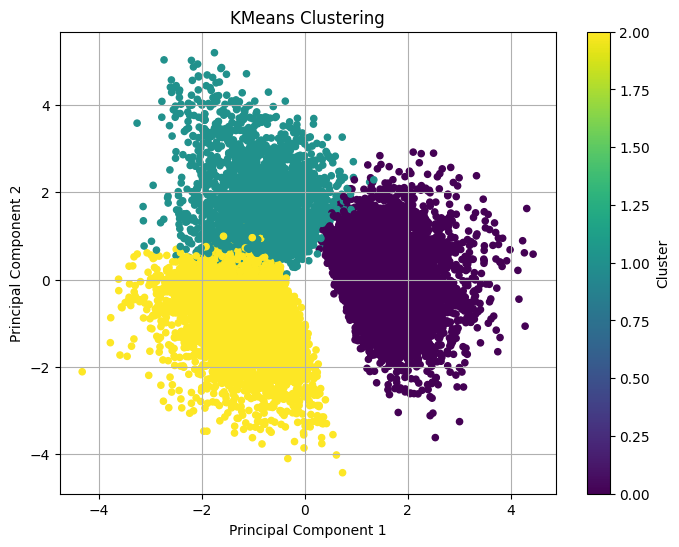

In [ ]:
# Reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_cluster, cmap='viridis', s=20)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

**DBSCAN Clustering**

In [ ]:
dbscan = DBSCAN(eps=0.25, min_samples=5)
dbscan_cluster = dbscan.fit_predict(df_scaled)

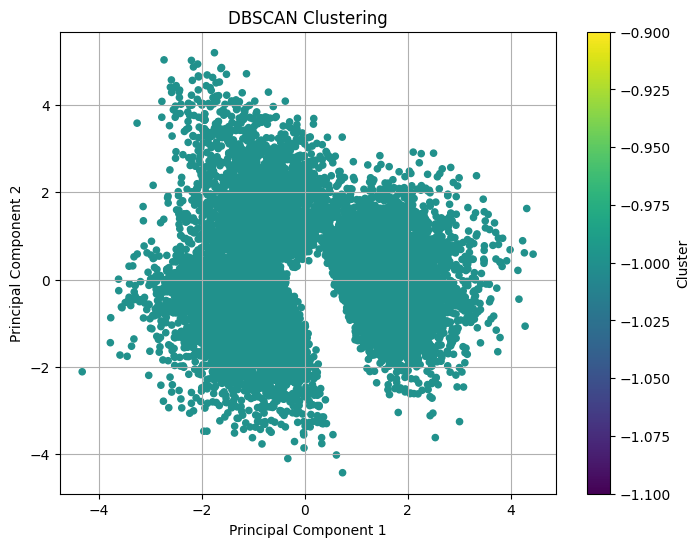

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan_cluster, cmap='viridis', s=20)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

**KNN Clustering**

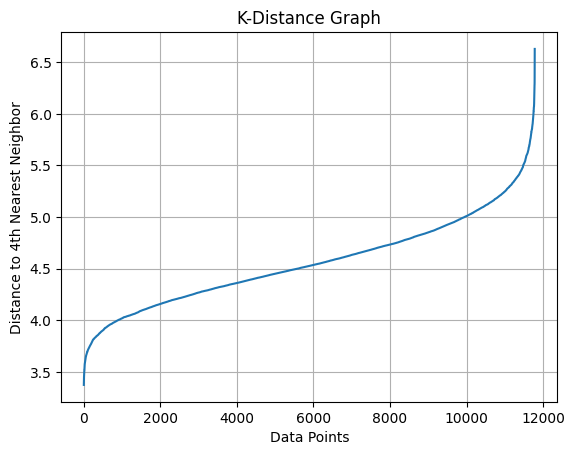

In [ ]:
# Compute the k-nearest neighbors of each data point
k = 4  # Choose an appropriate value of k
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(df_scaled)
distances, _ = neigh.kneighbors(df_scaled)

# Sort the distances and plot the k-distance graph
sorted_distances = np.sort(distances[:, -1])
plt.plot(np.arange(len(df_scaled)), sorted_distances)
plt.xlabel('Data Points')
plt.ylabel(f'Distance to {k}th Nearest Neighbor')
plt.title('K-Distance Graph')
plt.grid(True)
plt.show()
